In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape
# Here 784 cols are for pixels and one shows label or the image they contain

(42000, 785)

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21127,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

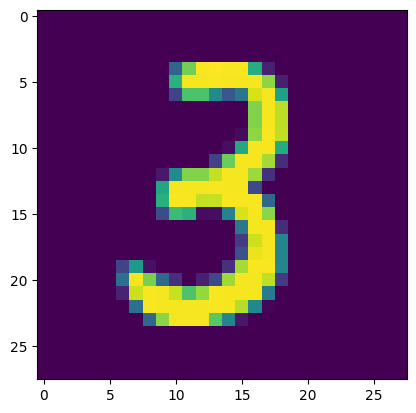

In [7]:
plt.imshow(df.iloc[15384, 1:].values.reshape(28,28))

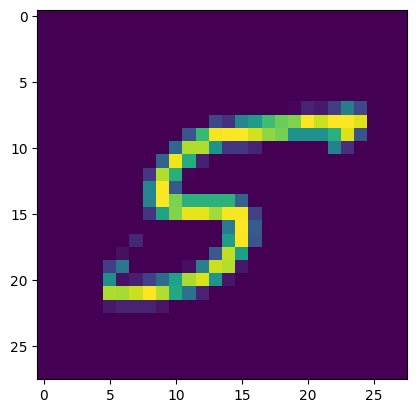

In [8]:
plt.imshow(df.iloc[6788, 1:].values.reshape(28,28))

In [9]:
# Separate dependent and ind cols
X=df.iloc[:, 1:]
y=df['label']

In [10]:
# Train test split
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
X_train.shape

(33600, 784)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier()

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
import time
start= time.time()
y_pred=knn.predict(X_test) # I just tried to find out the time take to predict the 
print(time.time()-start)

12.508152961730957


In [17]:
# In the abobe code we found y_pred and we used KNN classifier, here each row is compare with all 33000 rows and chose the nearest.

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [19]:
# We get an accuracy of 96.4% using this method

### PCA

In [20]:
# Now we'll try to achieve same or more accuracy using far less no. of columns through PCA

In [21]:
# First step is standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_train_sc=scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [23]:
from sklearn.decomposition import PCA

pca=PCA(n_components=None)  # Default value is none which means there will be same no. of PC as initials rows

In [24]:
X_train_trf1 = pca.fit_transform(X_train_sc)
X_test_trf1 = pca.transform(X_test_sc)

In [25]:
X_train_trf1.shape

(33600, 784)

In [26]:
# We still have 784 cols

In [27]:
knn=KNeighborsClassifier()

In [28]:
knn.fit(X_train_trf1, y_train)

y_pred2=knn.predict(X_test_trf1)

In [29]:
accuracy_score(y_test, y_pred2)

0.9391666666666667

In [30]:
# Since we did not reduce dim our accuracy reduced
# Lets reduce the Dimension to 100

In [31]:
from sklearn.decomposition import PCA

pca2=PCA(n_components=100)

In [32]:
X_train_trf2 = pca2.fit_transform(X_train_sc)
X_test_trf2 = pca2.transform(X_test_sc)

In [33]:
X_train_trf2.shape

(33600, 100)

In [34]:
knn.fit(X_train_trf2, y_train)

y_pred3 = knn.predict(X_test_trf2)

accuracy_score(y_test, y_pred3)

0.9552380952380952

In [35]:
# We used the same KNN Classiefier after appling PCA and got 95.33% accuracy with only 100 col

In [36]:
for i in range(1,785):
    pca3=PCA(n_components=i)

    X_train_trf3=pca3.fit_transform(X_train_sc)
    X_test_trf3 = pca3.transform(X_test_sc)

    knn=KNeighborsClassifier()
    knn.fit(X_train_trf3, y_train)
    y_pred4 = knn.predict(X_test_trf3)

    print(accuracy_score(y_test, y_pred4))

0.25833333333333336
0.32404761904761903
0.5104761904761905
0.6666666666666666
0.7375
0.8225
0.8432142857142857
0.8717857142857143
0.8866666666666667
0.9053571428571429
0.9117857142857143
0.9177380952380952
0.9277380952380953
0.9348809523809524
0.9384523809523809
0.9375
0.9415476190476191
0.940952380952381
0.9417857142857143
0.9444047619047619
0.9428571428571428
0.9448809523809524
0.9439285714285715
0.945595238095238
0.9473809523809524
0.9479761904761905
0.9483333333333334
0.9473809523809524
0.9511904761904761
0.9504761904761905
0.9508333333333333
0.9508333333333333
0.9495238095238095
0.9501190476190476
0.9515476190476191
0.9520238095238095
0.9521428571428572
0.9536904761904762
0.9536904761904762
0.9528571428571428
0.9528571428571428
0.9520238095238095
0.9528571428571428
0.9530952380952381
0.9539285714285715
0.9534523809523809
0.9534523809523809
0.9536904761904762
0.9530952380952381
0.9538095238095238
0.9536904761904762
0.9544047619047619
0.9541666666666667
0.9547619047619048
0.95416666